In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from datetime import datetime
import scipy.stats as stats
import os
import math

In [2]:
# path = r'C:\Users\thutz\storage control\201601-zip+4-60004\ANONYMOUS_DATA_201601_60004-1528.csv.gz'
# raw_data = pd.read_csv(path,compression='gzip')
# num_of_data = 700
# data = raw_data.iloc[:num_of_data,:]

In [3]:
path = r'C:\Users\thutz\storage control\data'
files = os.listdir(path)
raw_data = pd.DataFrame([])
flag = 0
for file in files:
#     if flag >= 4:
#         break
    d_1 = raw_data
    data_path = path+'/'+file
    d_2 = pd.read_csv(data_path)
    frames = [d_1,d_2]
    raw_data = pd.concat(frames)
#     flag += 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [40]:
raw_data = raw_data.dropna(axis = 1,how='all')
raw_data = raw_data.dropna(axis = 0, how = 'any')

In [41]:
raw_data

,ACCOUNT_IDENTIFIER,DELIVERY_SERVICE_CLASS,DELIVERY_SERVICE_NAME,INTERVAL_HR0030_ENERGY_QTY,INTERVAL_HR0100_ENERGY_QTY,INTERVAL_HR0130_ENERGY_QTY,INTERVAL_HR0200_ENERGY_QTY,INTERVAL_HR0230_ENERGY_QTY,INTERVAL_HR0300_ENERGY_QTY,INTERVAL_HR0330_ENERGY_QTY,...,INTERVAL_HR2130_ENERGY_QTY,INTERVAL_HR2200_ENERGY_QTY,INTERVAL_HR2230_ENERGY_QTY,INTERVAL_HR2300_ENERGY_QTY,INTERVAL_HR2330_ENERGY_QTY,INTERVAL_HR2400_ENERGY_QTY,INTERVAL_LENGTH,INTERVAL_READING_DATE,TOTAL_REGISTERED_ENERGY,ZIP_CODE
0,1.000600e+17,C24,RESIDENTIAL MULTI,0.0750,0.1225,0.0775,0.1200,0.0875,0.1125,0.0950,...,0.2550,0.1900,0.1900,0.0700,0.1100,0.0650,1800,01/01/2016,10.8668,60004-1528
1,1.000600e+17,C24,RESIDENTIAL MULTI,0.1250,0.0875,0.1125,0.1000,0.1000,0.1100,0.0900,...,0.2225,0.1850,0.1425,0.0825,0.0975,0.0900,1800,01/02/2016,8.6197,60004-1528
2,1.000600e+17,C24,RESIDENTIAL MULTI,0.0900,0.0975,0.0825,0.1025,0.0775,0.1075,0.0725,...,0.2150,0.1875,0.2100,0.1075,0.0975,0.0850,1800,01/03/2016,7.9629,60004-1528
3,1.000600e+17,C24,RESIDENTIAL MULTI,0.0950,0.0900,0.0900,0.0925,0.0875,0.0950,0.0875,...,0.1825,0.2125,0.1850,0.0925,0.0975,0.0800,1800,01/04/2016,9.8854,60004-1528
4,1.000600e+17,C24,RESIDENTIAL MULTI,0.1075,0.0700,0.1125,0.0650,0.1725,0.1350,0.1075,...,0.2850,0.2450,0.1900,0.0675,0.1075,0.0925,1800,01/05/2016,10.2979,60004-1528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,1.000660e+18,C24,RESIDENTIAL MULTI,0.0275,0.0825,0.0475,0.0300,0.0900,0.0350,0.0425,...,0.0600,0.0800,0.1025,0.0275,0.0575,0.0700,1800,12/27/2016,3.0779,60004-1528
709,1.000660e+18,C24,RESIDENTIAL MULTI,0.0275,0.0675,0.0575,0.0275,0.0800,0.0450,0.0325,...,0.0575,0.1125,0.0700,0.0275,0.0900,0.0375,1800,12/28/2016,3.0654,60004-1528
710,1.000660e+18,C24,RESIDENTIAL MULTI,0.0425,0.0850,0.0250,0.0575,0.0700,0.0275,0.0725,...,0.0775,0.1125,0.0500,0.0600,0.0675,0.0250,1800,12/29/2016,3.0632,60004-1528
711,1.000660e+18,C24,RESIDENTIAL MULTI,0.0775,0.0500,0.0275,0.0900,0.0375,0.0450,0.0825,...,0.0975,0.0575,0.1025,0.0525,0.0300,0.0900,1800,12/30/2016,3.1268,60004-1528


In [43]:
def calculate_cost_dp(i,j,gamma,mu_c,mu_d,C_sup,P,A_c,A_d,List_ECDF):
    '''
    parameters::
        j: battery level index;
        gamma: storage loss factor;
        mu_c: charging inefficiency;
        mu_d: discharging inefficiency;
        C_sup: battery capacity;
        G: cost function;
        i: time slot;
        P: price vector;
        A_c: charging constraint;
        A_d: discharging constraint;
        Dict_ECDF: distribution function vector;
    return::
        G_i: The cost after time slot i at battery level b;
    '''
    if i == T-1:
        return 0
    if G[i,j] < 99999999:
        return G[i,j]
    G[i,j] = 0
    F = List_ECDF[i]
    PMF_F = np.diff(F.y)
    p = P[i]
    b = j*epsilon
    alpha = 1/gamma
    eta_c = 1/mu_c
    eta_d = 1/mu_d
    nu = 1/epsilon
    for s in range(1,len(F.x)):
        x = F.x[s]
        U_x_min = int(np.floor((gamma*max(0,b-eta_d*x,b-A_d))*nu))
        U_x_max = int(np.floor((gamma*min(C_sup,b+A_c))*nu))
        G_min = 1000000000
        b_min = U_x_min
        for k in range(U_x_min,U_x_max):
            G_i_1 = calculate_cost_dp(i+1,k,gamma,mu_c,mu_d,C_sup,P,A_c,A_d,List_ECDF)
            x_p = max((alpha*k*epsilon-b),0)
            x_n = min((alpha*k*epsilon-b),0)
            g = (x+x_p*eta_c-x_n*mu_d)*p
            if math.isnan(g):
                print(i,j,x,s,len(F.x))
            if G_min > (G_i_1+g):
                G_min = G_i_1+g
        G[i,j] += G_min*PMF_F[s-1]
    return G[i,j]

In [48]:
G_value_list = []
delta = 0.01
gamma = 0.99
mu_d = 0.99
mu_c = 0.99
C_sup = 0.1
A_c = 0.05
A_d = 0.05
T = 48
np.random.seed(100)
P = np.random.uniform(low=0.1,high=1,size = T)
P[-1] = np.random.uniform(low = 0,high=0.1,size=1)
for num in range(15,int(len(raw_data)/100)-64):
    number_of_data = 100*num
    data = raw_data.iloc[:number_of_data,:]
    List_ECDF = []
    for i in range(48):
        ecdf = ECDF(data.iloc[:,i+3])
        List_ECDF.append(ecdf)
    
    G_value = []
    for k in range(10,11):
        epsilon = 0.001*k
        N = int(C_sup/epsilon)
        G = 99999999*np.ones((T,N))
        t1 = datetime.now()
        G[0,N-1] = calculate_cost_dp(0,N-1,gamma,mu_c,mu_d,C_sup,P,A_c,A_d,List_ECDF)
        t2 = datetime.now()
        print(t2-t1)
        G_value.append(G[0,N-1])
    G_value_list.append(G_value)

0:00:12.005198
0:00:17.592067
0:00:17.062195
0:00:19.388004


In [49]:
G_value_list

[[3.736865272882125],
 [3.77937117634343],
 [3.799165571169237],
 [3.7664346591613134]]

In [46]:
G

array([[9.99999990e+07, 9.99999990e+07, 9.99999990e+07, 9.99999990e+07,
        9.99999990e+07, 9.99999990e+07, 9.99999990e+07, 9.99999990e+07,
        9.99999990e+07, 3.73686527e+00],
       [9.99999990e+07, 9.99999990e+07, 9.99999990e+07, 3.63966723e+00,
        3.64093042e+00, 3.64227747e+00, 3.64372359e+00, 3.64595953e+00,
        3.64819635e+00, 9.99999990e+07],
       [3.59190549e+00, 3.59307450e+00, 3.59424488e+00, 3.59543725e+00,
        3.59666467e+00, 3.59797596e+00, 3.59938631e+00, 3.60158649e+00,
        3.60378754e+00, 9.99999990e+07],
       [3.53809007e+00, 3.53920989e+00, 3.54033109e+00, 3.54147427e+00,
        3.54265251e+00, 3.54391461e+00, 3.54527578e+00, 3.54742678e+00,
        3.54957864e+00, 9.99999990e+07],
       [3.44995249e+00, 3.45098453e+00, 3.45201795e+00, 3.45307336e+00,
        3.45416382e+00, 3.45533814e+00, 3.45661153e+00, 3.45867476e+00,
        3.46073884e+00, 9.99999990e+07],
       [3.43966227e+00, 3.44173545e+00, 3.44380889e+00, 3.44588335e+00,
   

In [11]:
mu = np.mean(data.iloc[:,7:55],axis = 0)
    sigma = np.std(data.iloc[:,7:55],axis = 0)
    lower = np.min(data.iloc[:,7:55],axis = 0)
    upper = np.max(data.iloc[:,7:55],axis = 0)
    lower_std = np.divide(lower-mu,sigma)
    upper_std = np.divide(upper-mu,sigma)

In [12]:
# X = []
# for i in range(48):
    
#     X.append(sigma[i]*stats.truncnorm.rvs(lower_std[i],upper_std[i],size = 3000)+mu[i])

In [13]:
a,b,loc,scale = stats.truncnorm.fit(data.iloc[:,7])
max(stats.truncnorm.rvs((a-loc)/scale,(b-loc)/scale,size = 1000))*scale+loc

0.7536939925269983

# Define Constants

In [54]:
calculate_cost_dp(45,5,gamma,mu_c,mu_d,C_sup,P,A_c,A_d,List_ECDF)

0.3289918796794288

In [66]:
ecdf.x

array([  -inf, 0.005 , 0.0075, ..., 0.6675, 0.68  , 0.7775])

In [16]:
G_value

[3.8327790805950595]

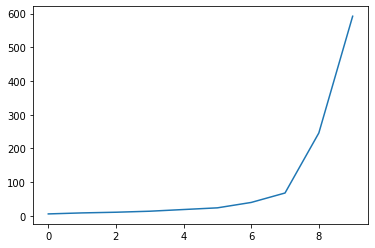

In [160]:
plt.plot([6,9,11,14,19,24,40,68,246,592])

In [20]:
# t1 = datetime.now()
# for i in range(T):
#     for j in range(N):
#         G[i,j] = calculate_cost_dp(i,j,gamma,mu_c,mu_d,C_sup,P,A_c,A_d,List_ECDF)
# t2 = datetime.now()
# print(t2-t1)

0:10:54.548789


In [22]:
G[0,N-1]

3.8057218095574976

In [25]:
X = []
Y = []
for i in range(48):
    x = np.sort(data.iloc[:,i+7])
    X.append(x)
    Y.append(stats.truncnorm.cdf((x-mu[i])/sigma[i],lower_std[i],upper_std[i]))

In [26]:
G_trunc = 99999999*np.ones((T,N))

In [27]:
def calculate_cost_dp_truncnorm(i,j,gamma,mu_c,mu_d,C_sup,P,A_c,A_d,X,Y):
    '''
    parameters::
        j: battery level index;
        gamma: storage loss factor;
        mu_c: charging inefficiency;
        mu_d: discharging inefficiency;
        C_sup: battery capacity;
        G: cost function;
        i: time slot;
        P: price vector;
        A_c: charging constraint;
        A_d: discharging constraint;
        Dict_ECDF: distribution function vector;
    return::
        G_i: The cost after time slot i at battery level b;
    '''
    if i == T-1:
        return 0
    if G_trunc[i,j] < 99999999:
        return G_trunc[i,j]
    G_trunc[i,j] = 0
    PMF = np.diff(Y[i])
    p = P[i]
    b = j*epsilon
    alpha = 1/gamma
    eta_c = 1/mu_c
    eta_d = 1/mu_d
    nu = 1/epsilon
    for s in range(len(PMF)):
        x = X[i][s]
        U_x_min = int(np.floor((gamma*max(0,b-eta_d*x,b-A_d))*nu))
        U_x_max = int(np.floor((gamma*min(C_sup,b+A_c))*nu))
        G_min = 100000000
        b_min = U_x_min
        for k in range(U_x_min,U_x_max+1):
            G_i_1 = calculate_cost_dp_truncnorm(i+1,k,gamma,mu_c,mu_d,C_sup,P,A_c,A_d,X,Y)
            g = (x+max((alpha*k*epsilon-b),0)*eta_c-min((alpha*k*epsilon-b),0)*mu_d)*p
            if G_min > (G_i_1+g):
                G_min = G_i_1+g
        G_trunc[i,j] += G_min*PMF[s]
    return G_trunc[i,j]

In [28]:
t1 = datetime.now()
for i in range(T):
    for j in range(N):
        G_trunc[i,j] = calculate_cost_dp_truncnorm(i,j,gamma,mu_c,mu_d,C_sup,P,A_c,A_d,X,Y)
t2 = datetime.now()
print(t2-t1)

0:00:06.801313


In [29]:
len(G_trunc)

48

In [31]:
G_trunc

array([[5.17005402, 5.17199258, 5.17393128, 5.17587058, 5.17781061,
        5.17975166, 5.18169427, 5.18365778, 5.18558873, 5.18752142],
       [5.02804123, 5.02990407, 5.03176706, 5.03363065, 5.03549496,
        5.0373603 , 5.03922719, 5.04111499, 5.04297023, 5.04482721],
       [4.90671842, 4.90850748, 4.91029669, 4.9120865 , 4.91387704,
        4.91566861, 4.91746172, 4.91927574, 4.9210572 , 4.9228404 ],
       [4.79861224, 4.80032538, 4.80203866, 4.80375254, 4.80546715,
        4.80718279, 4.80889997, 4.81063807, 4.8123436 , 4.81405088],
       [4.67200824, 4.67362369, 4.67523929, 4.67685549, 4.67847241,
        4.68009037, 4.68170986, 4.68335028, 4.68495812, 4.68656771],
       [4.5526092 , 4.55412715, 4.55564524, 4.55716393, 4.55868335,
        4.56020381, 4.5617258 , 4.56326871, 4.56477905, 4.56629114],
       [4.52624736, 4.52774346, 4.52923971, 4.53073656, 4.53223413,
        4.53373274, 4.53523289, 4.53675395, 4.53824245, 4.53973269],
       [4.50409741, 4.50557562, 4.5070539

In [33]:
G[10,:] < G_trunc[10,:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [38]:
kernel = stats.gaussian_kde(data.iloc[:,7])
kernel.pdf(np.sort(data.iloc[:,7]))

array([2.12891319, 2.12891319, 2.12891319, 2.2738691 , 2.2738691 ,
       2.2738691 , 2.2738691 , 2.2738691 , 2.2738691 , 2.2738691 ,
       2.56991902, 2.71960987, 2.86943063, 2.86943063, 2.86943063,
       3.01862523, 3.01862523, 3.01862523, 3.01862523, 3.01862523,
       3.16643232, 3.16643232, 3.16643232, 3.16643232, 3.31209474,
       3.31209474, 3.31209474, 3.31209474, 3.31209474, 3.31209474,
       3.31209474, 3.31209474, 3.31209474, 3.31209474, 3.45486884,
       3.45486884, 3.45486884, 3.45486884, 3.45486884, 3.45486884,
       3.45486884, 3.45486884, 3.45486884, 3.45486884, 3.59403345,
       3.59403345, 3.59403345, 3.59403345, 3.59403345, 3.59403345,
       3.59403345, 3.59403345, 3.7288983 , 3.7288983 , 3.7288983 ,
       3.7288983 , 3.7288983 , 3.7288983 , 3.7288983 , 3.7288983 ,
       3.7288983 , 3.7288983 , 3.7288983 , 3.7288983 , 3.7288983 ,
       3.85881174, 3.85881174, 3.85881174, 3.85881174, 3.85881174,
       3.85881174, 3.85881174, 3.85881174, 3.85881174, 3.85881

In [52]:
X_k = []
Y_k = []
for i in range(48):
    x = np.sort(data.iloc[:,i+7])
    X_k.append(x)
    kernel = stats.gaussian_kde(x)
    pdf = kernel.pdf(x)
    diff_x = np.diff(x)
    pmf = []
    cdf = []
    for j in range(len(diff_x)):
        pmf.append(diff_x[j]*pdf[j])
        cdf.append(sum(pmf))
    cdf.append(1)  
    Y_k.append(cdf)

In [53]:
G_kernel = 99999999*np.ones((T,N))

In [55]:
def calculate_cost_dp_kernel(i,j,gamma,mu_c,mu_d,C_sup,P,A_c,A_d,X_k,Y_k):
    '''
    parameters::
        j: battery level index;
        gamma: storage loss factor;
        mu_c: charging inefficiency;
        mu_d: discharging inefficiency;
        C_sup: battery capacity;
        G: cost function;
        i: time slot;
        P: price vector;
        A_c: charging constraint;
        A_d: discharging constraint;
        Dict_ECDF: distribution function vector;
    return::
        G_i: The cost after time slot i at battery level b;
    '''
    if i == T-1:
        return 0
    if G_kernel[i,j] < 99999999:
        return G_kernel[i,j]
    G_kernel[i,j] = 0
    PMF = np.diff(Y[i])
    p = P[i]
    b = j*epsilon
    alpha = 1/gamma
    eta_c = 1/mu_c
    eta_d = 1/mu_d
    nu = 1/epsilon
    for s in range(len(PMF)):
        x = X[i][s]
        U_x_min = int(np.floor((gamma*max(0,b-eta_d*x,b-A_d))*nu))
        U_x_max = int(np.floor((gamma*min(C_sup,b+A_c))*nu))
        G_min = 1000000
        b_min = U_x_min
        for k in range(U_x_min,U_x_max+1):
            G_i_1 = calculate_cost_dp_kernel(i+1,k,gamma,mu_c,mu_d,C_sup,P,A_c,A_d,X_k,Y_k)
            g = (x+max((alpha*k*epsilon-b),0)*eta_c-min((alpha*k*epsilon-b),0)*mu_d)*p
            if G_min > (G_i_1+g):
                G_min = G_i_1+g
        G_kernel[i,j] += G_min*PMF[s]
    return G_kernel[i,j]

In [56]:
t1 = datetime.now()
for i in range(T):
    for j in range(N):
        G_kernel[i,j] = calculate_cost_dp_kernel(i,j,gamma,mu_c,mu_d,C_sup,P,A_c,A_d,X_k,Y_k)
t2 = datetime.now()
print(t2-t1)

0:00:07.096205


In [66]:
G_trunc[:,-1]>G[:,-1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [21]:
# %load_ext line_profiler

In [22]:
# %lprun -f calculate_cost_dp calculate_cost_dp(0,1,gamma,mu_c,mu_d,C_sup,P,A_c,A_d,List_ECDF)